# Exploração e análise de dados de crédito com SQL

O foco deste projeto de SQL é manusear dados desde a obtenção, resgate no bucket, execução de queries e toda a parte de análise descritiva. Além do SQL, em algumas partes do projeto, utilizaremos Python para gerar gráficos que melhoram nossa percepção e nos ajudam a criar insights. Estamos utilizando uma base de dados fictícia de uma instituição bancária, e o principal objetivo deste trabalho é gerar insights quanto a melhorias de serviços, processos e estratégias para a empresa.


### Dicionário de dados

Os dados estão dispostos em uma tabela com uma linha para cada cliente, e uma coluna para cada variável armazenando as características desses clientes. Colocamos uma cópia o dicionário de dados (explicação dessas variáveis) abaixo neste notebook:


| Variável                | Descrição                                           | Tipo             |
| ----------------------- |:---------------------------------------------------:| --------------:  |
| idade                   |  idade do cliente em anos                           | inteiro          |
| sexo                    |  M = 'Masculino'; F = 'Feminino'                    | texto            |
| dependentes             |  Número de dependentes do cliente                   | inteiro          |
| escolaridade            |  Nível de escolaridade do clientes                  | texto            |
| salario_anual           |  Faixa salarial do cliente                          | texto            |
| tipo_cartao             |  Tipo de cartao do cliente                          | texto            |
| qtd_produtos            |  Quantidade de produtos comprados nos últimos 12 meses| texto          |
| iteracoes_12m           |  Quantidade de iterações/transacoes nos ultimos 12 meses| inteiro      |
| meses_inativo_12m       |  Quantidade de meses que o cliente ficou inativo    | inteiro          |
| limite_credito          |  Llimite de credito do cliente                      | ponto flutuante  |
| valor_transacoes_12m    |  Valor das transações dos ultimos 12 meses          | ponto flutuante  |
| qtd_transacoes_12m      |  Quantidade de transacoes dos ultimos 12 meses      | inteiro          |


## Exploração de dados:

A base de dados do link é mais robusta, contendo mais linhas. Para a realização deste projeto, foi retirada uma pequena fração dos dados. Na prática, quanto maior a quantidade de dados utilizada, mais confiável a análise! Porém, existem limites computacionais e financeiros, nos quais a redução de dados para análise, para fins de estudo, se torna interessante.

A primeira fase da análise é entender o que tem na nossa matéria prima. Vamos a exploração de dados:

**Qual a quantidade de informações temos na nossa base de dados?**

Query: 
```sql
SELECT count(*) FROM credito
```
> Reposta: 2564 linhas

**Como são os dados?**

Query: 
```sql
SELECT * FROM credito;
```
> Resposta:
![Imagem](Queries/SELECTFROMcredito.png)

>É possível reparar que existem algumas informações nulas na tabela (valor na), vamos olhar mais de perto para os valores de cada coluna!

**Quais os tipos de cada dado?**

Query:
```sql
DESC credito;
```
> Resposta:

![tipo_dado](Queries/DESCcredito.png)

Agora que ja entendemos quais são os tipos de dados, vamos olhar mais atentamente para as varíaveis que não são numéricas.

**Quais são os tipos de escolaridade disponíveis no dataset?**

Query:
```sql
SELECT DISTINCT escolaridade FROM credito;;
```
> Resposta:

![tipo_escolaridade](Queries/DISTINCTescolaridade.png)

> Os dados contam com vários níveis de escolaridade e é possível perceber que temos valores nulos (na) no dataset, trataremos isso mais tarde!

**Será que temos mais valores nulos?**

Quais são os tipos de estado_civil disponíveis no dataset?


Query:
```sql
SELECT DISTINCT estado_civil FROM credito;
```
> Resposta:

![tipo_estado_civil](Queries/DISTINCTestado_civil.png)

> Novamente encontramos valores nulos nos dados de estado civil!

**Quais são os tipos de salario_anual disponíveis no dataset?**


Query:
```sql
SELECT DISTINCT salario_anual FROM credito;
```
> Resposta:

![salario_anual](Queries/DISTINCTsalario_anual.png)

> Os salários nesse dataset não estão expostas com o valor exato que o cliente ganha. O que está informado é a faixa salarial de cada um. Também contem dados nulos.

**Quais são os tipos de cartão disponíveis no dataset?**

Query:
```sql
SELECT DISTINCT tipo_cartao FROM credito;
```
> Resposta:

![tipo_cartao](Queries/DISTINCTtipo_cartao.png)

> Aqui vemos que não há necessidade de tratar valores nulos.

## Análise de dados
Uma vez que exploramos o dados e buscamos entender quais são as informações que temos no nosso banco de dados, podemos analisar as informações para buscar entender o que está acontecendo no banco de dados.

**Nesse banco de dados, quantos clientes temos de cada faixa salarial?**

Query:
```sql
SELECT COUNT(*) AS contagem, salario_anual FROM credito GROUP BY salario_anual;
```
> Resposta:
 
![contagem_faixa_salario](Queries/contagem_faixa_salario.png)


> A maioria dos clientes dessa base de dados possui um renda menor que 40K e existem 235 clientes que não informaram ou não consta a faixa salarial. De certa forma, pode ser interessante para a empresa focar nesse público de mais baixa renda.

**Nesse banco de dados, quantos clientes são homens e quantos são mulheres?**

Query:
```sql
SELECT COUNT(*) AS contagem, sexo FROM credito GROUP BY sexo;
```
> Resposta:

![contagem_sexo](Queries/contagem_sexo.png)

**Queremos focar o nosso marketing de maneira adequada para nossos clientes, qual será a idade deles?**

Query:
```sql
SELECT AVG(idade) as media_idade, MIN(idade) as min_idade, MAX(idade) as max_idade, sexo FROM credito GROUP BY sexo;
```
> Resposta:

![medias_idade_sexo](Queries/medias_idade_sexo.png)


> Por meio dessa análise não foi possível extrair nenhuma informação relevante. A menor idade dos dois sexos é a mesma e a média é muito similar. A unica diferença é a idade máxima mas fato quase irrelevante por a diferença não é tão gritante.xo

**Qual a maior e menor transação dos clientes?**

Query:
```sql
SELECT MIN(valor_transacoes_12m) AS transacao_minima, MAX(valor_transacoes_12m) AS trasacao_maxima FROM credito;
```
> Resposta:

![transaoes](Queries/transaoes.png)

> Nesse banco de dados temos soma de transações em 12 meses variam de 510.16 a 5776.58

**Quais as características dos clientes que possuem os maiores creditos?**

Query:
```sql
SELECT MAX(limite_credito) AS limite_credito, escolaridade, tipo_cartao, sexo
FROM credito
WHERE escolaridade != 'na' and tipo_cartao != 'na'
GROUP BY escolaridade, tipo_cartao, sexo
ORDER BY limite_credito DESC
```
> Resposta:

![caracteristicas_credito](Queries/caracteristicas_credito.png)

> Não parece haver um impacto da escolaridade no limite. O limite mais alto é oferecido para um homem sem educação formal. O cartão também parece não estar relacionado com a escolaridade nem com o limite. Dentre os maiores limites, encontramos clientes com cartão: gold, silver, platinum e blue

**Quais as características dos clientes que possuem os menores creditos?**

Query:
```sql
SELECT MAX(limite_credito) AS limite_credito, escolaridade, tipo_cartao, sexo
FROM credito
WHERE escolaridade != 'na' and tipo_cartao != 'na'
GROUP BY escolaridade, tipo_cartao, sexo
ORDER BY limite_credito ASC
```
> Resposta:

![caracteristicas_credito_menores](Queries/caracteristicas_credito_menores.png)

> Dessa vez conseguimos perceber que não há clientes com cartão platinum dentre os menores limites. Também foi possível perceber que a maioria dos menores limites são mulheres enquanto nos maiores limites predomina homens.

**O salário impacta no limite?**

Query:
```sql
SELECT AVG(qtd_produtos) AS qtd_produtos, AVG(valor_transacoes_12m) as media_valor_transacoes, AVG(limite_credito) AS media_limite, sexo, salario_anual 
FROM credito
WHERE salario_anual != 'na'
GROUP BY sexo, salario_anual
ORDER BY AVG(valor_transacoes_12m) DESC
```
> Resposta:

![salario_impacto](Queries/salario_impacto.png)

Query: 
> SIM! As pessoas que tem menor faixa salarial também apresentam menor limite de credito!

### Visualização de Dados
Para melhorar nossa análise, irei adicionar elementos visuais com gráficos que aprimoram nossa percepção dos dados. Para isso, utilizarei Python e duas bibliotecas: o pandas, para auxiliar no manuseio dos dados, e o matplotlib, para gerar os gráficos.

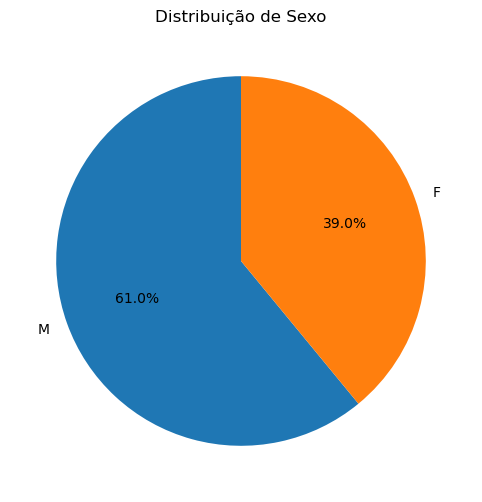

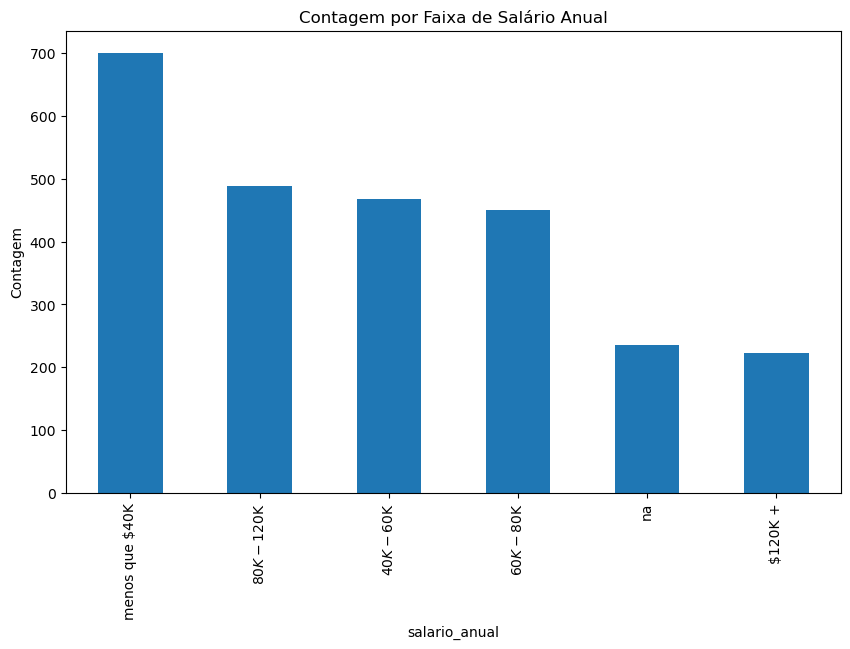

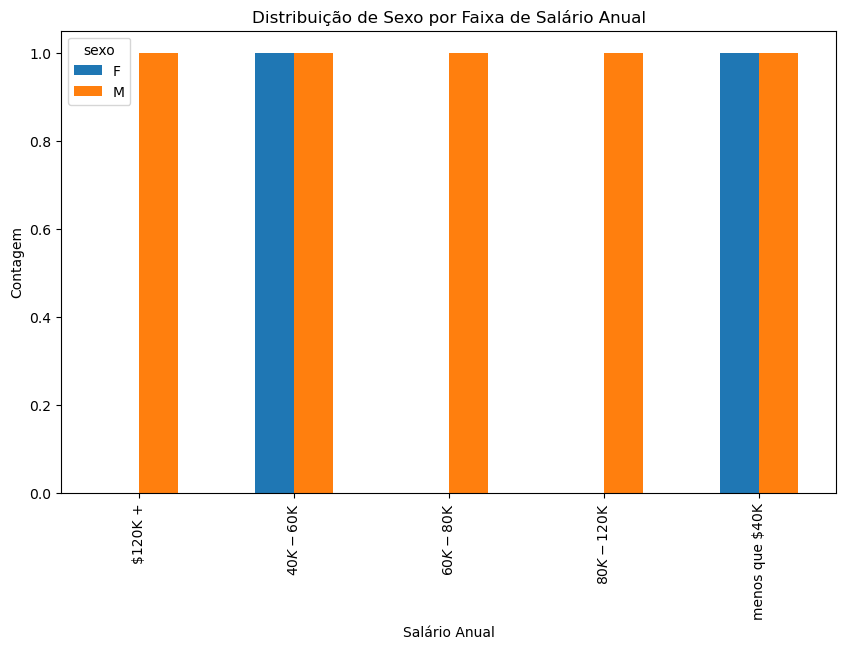

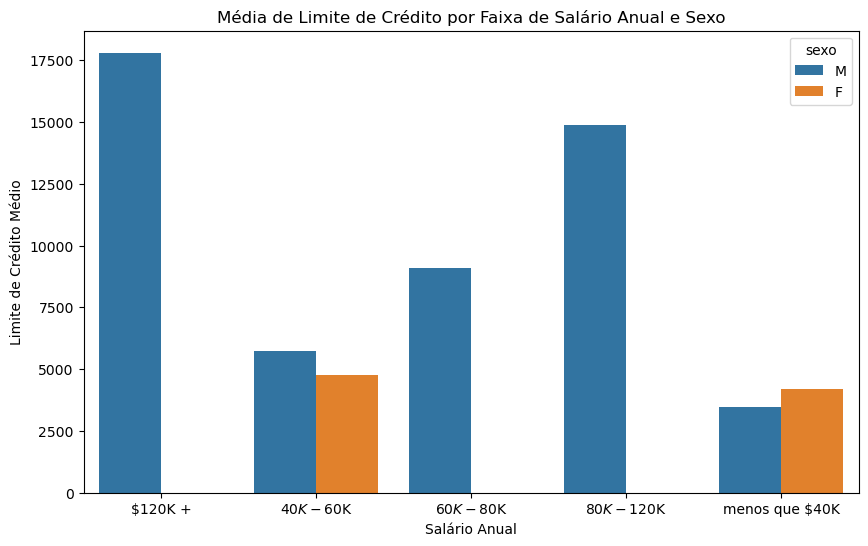

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

colunas = ['idade', 'sexo', 'dependentes', 'escolaridade', 'estado_civil', 'salario_anual', 'tipo_cartao', 
           'qtd_produtos', 'iteracoes_12m', 'meses_inativo_12m', 'limite_credito', 
           'valor_transacoes_12m', 'qtd_transacoes_12m']
df = pd.DataFrame(columns=colunas)
df = pd.read_csv('credit_base.csv', names=colunas, header=None)

cont_sexo = df['sexo'].value_counts()
cont_sexo.plot(kind='pie', autopct='%1.1f%%', startangle=90, figsize=(10, 6))
plt.ylabel('')
plt.title('Distribuição de Sexo')
plt.savefig('Gráficos/Distribuição de Sexo.png')
plt.show()

df['salario_anual'].value_counts().plot(kind='bar', figsize=(10, 6))
plt.ylabel('Contagem')
plt.title('Contagem por Faixa de Salário Anual')
plt.savefig('Gráficos/Contagem por Faixa de Salário Anual.png')
plt.show()

df_salario = pd.read_csv('salarioxlimite.csv')

pd.crosstab(df_salario['salario_anual'], df_salario['sexo']).plot(kind='bar', figsize=(10, 6))
plt.title('Distribuição de Sexo por Faixa de Salário Anual')
plt.xlabel('Salário Anual')
plt.ylabel('Contagem')
plt.savefig('Gráficos/Distribuição de Sexo por Faixa de Salário Anual.png')
plt.show()

df_salario = df_salario.groupby(['salario_anual', 'sexo'])['media_limite'].mean().reset_index()
plt.figure(figsize=(10, 6))
sns.barplot(x='salario_anual', y='media_limite', hue='sexo', data=df_salario)
plt.title('Média de Limite de Crédito por Faixa de Salário Anual e Sexo')
plt.xlabel('Salário Anual')
plt.ylabel('Limite de Crédito Médio')
plt.savefig('Gráficos/Média de Limite de Crédito por Faixa de Salário Anual e Sexo.png')
plt.show()

## insights gerados

Conclusões de nossa analise:

- Mais de 60% dos clientes são do sexo masculino;
- A maior parte dos clientes possui renda até 40K;
- A escolaridade não parece influenciar no limite nem no tipo do cartão;
- Os clientes com maiores limites são em sua maioria homens;
- Os clientes com menores limites são em sua maioria mulheres;
- Dentre os menores limites não há presença de cartão platinum;
- A faixa salarial impacta diretamente no limite de crédito;
- Não existem clientes do sexo feminino com salários anuais superior a 60K;
 
Uma exploração maior dos dados pode explicar porque as mulheres tem menor crédito. Isso também pode ser um problema cultural que pode ser repensado!